# Lab Sheet 02


## part A


### 01) Create a DataFrame with missing values and perform the following,

1. Identify missing values
2. Fill missing values with specified values
3. Drop rows with any missing values


In [4]:
import pandas as pd
import numpy as np

data1 = {
'Name': ['Alice', 'Bob', np.nan, 'David'],
'Age': [25, np.nan, 22, 28],
'City': ['Colombo', 'Kandy', 'Galle', np.nan]
}

df1 = pd.DataFrame(data1)
df1

Name   Age     City
0  Alice  25.0  Colombo
1    Bob   NaN    Kandy
2    NaN  22.0    Galle
3  David  28.0      NaN

In [5]:
df1.isnull()
 
# checking for NaN values in the DataFrame

Name    Age   City
0  False  False  False
1  False   True  False
2   True  False  False
3  False  False   True

In [6]:
df1_filled = df1.fillna({'Name': 'Unknown', 'Age': df1['Age'].mean(),
                         'City': 'Unknown'})
df1_filled

# This will fill NaN values with specified values or mean for Age

Name   Age     City
0    Alice  25.0  Colombo
1      Bob  25.0    Kandy
2  Unknown  22.0    Galle
3    David  28.0  Unknown

In [7]:
print(df1_filled)

      Name   Age     City
0    Alice  25.0  Colombo
1      Bob  25.0    Kandy
2  Unknown  22.0    Galle
3    David  28.0  Unknown


In [8]:
df1_dropped = df1.dropna()
df1_dropped
# this will drop rows with any NaN values

Name   Age     City
0  Alice  25.0  Colombo

In [9]:
print(df1_dropped)

    Name   Age     City
0  Alice  25.0  Colombo


### 02) Create a DataFrame with duplicate rows and,

1. Detect duplicate rows
2. Remove them


In [10]:
data2 = {
'ID': [1, 2, 3, 3, 4, 5, 5],
'Name': ['A', 'B', 'C', 'C', 'D', 'E', 'E']
}
df2 = pd.DataFrame(data2)
df2

ID Name
0   1    A
1   2    B
2   3    C
3   3    C
4   4    D
5   5    E
6   5    E

In [11]:
print(df2)

   ID Name
0   1    A
1   2    B
2   3    C
3   3    C
4   4    D
5   5    E
6   5    E


In [12]:
print(df2[df2.duplicated()])

   ID Name
3   3    C
6   5    E


In [13]:
df2_unique = df2.drop_duplicates()
df2_unique

# This will remove duplicate rows from the DataFrame

ID Name
0   1    A
1   2    B
2   3    C
4   4    D
5   5    E

In [14]:
print(df2_unique)

   ID Name
0   1    A
1   2    B
2   3    C
4   4    D
5   5    E


### 03) Create a DataFrame with incorrect data types and convert them to appropriate types


In [15]:
data3 = {
'ID': ['101', '102', '103'],
'JoinDate': ['2022-01-10', '2022-02-15',
'2022-03-01'],
'Salary': ['50000', '60000', '70000']
}
df3 = pd.DataFrame(data3)
df3

ID    JoinDate Salary
0  101  2022-01-10  50000
1  102  2022-02-15  60000
2  103  2022-03-01  70000

In [16]:
df3.dtypes

ID          object
JoinDate    object
Salary      object
dtype: object

In [17]:
df3['ID'] = df3['ID'].astype(int)
df3['JoinDate'] = pd.to_datetime(df3['JoinDate'])
df3['Salary'] = df3['Salary'].astype(float)

df3.dtypes

# changing data types of columns

ID                   int32
JoinDate    datetime64[ns]
Salary             float64
dtype: object

In [18]:
df3

ID   JoinDate   Salary
0  101 2022-01-10  50000.0
1  102 2022-02-15  60000.0
2  103 2022-03-01  70000.0

### 04) Create a DataFrame with inconsistent capitalization and whitespaces.

1. Remove extra spaces
2. Convert all text to lowercase


In [19]:
data4 = {
'Product': [' Apple ', 'BaNaNa', ' Cherry', 'DaTE ']
}

df4 = pd.DataFrame(data4)
print(df4)

# i used print here because df4 is self it don't show the spaces 
df4

   Product
0   Apple 
1   BaNaNa
2   Cherry
3    DaTE 


Product
0   Apple 
1   BaNaNa
2   Cherry
3    DaTE

In [20]:
df4['Product'] = df4['Product'].str.strip()
print(df4)

# this will remove leading and trailing spaces form the strings in the 'Product' column
df4

  Product
0   Apple
1  BaNaNa
2  Cherry
3    DaTE


Product
0   Apple
1  BaNaNa
2  Cherry
3    DaTE

In [21]:
df4['Product'] = df4['Product'].str.lower()
print(df4)
# this will convert all text in the column to lowercase

df4

  Product
0   apple
1  banana
2  cherry
3    date


Product
0   apple
1  banana
2  cherry
3    date

### 05) Create a DataFrame with numeric outliers and,

1. Detect values greater than a threshold
2. Replace them with the mean


In [22]:
data5 = {
'Score': [55, 60, 62, 90, 95, 200, 58, 59, 210]
}
df5 = pd.DataFrame(data5)
df5

Score
0     55
1     60
2     62
3     90
4     95
5    200
6     58
7     59
8    210

In [23]:
outliers = df5[df5['Score']>100]
outliers

# this will filter out rows where 'Score' is grater than 100


Score
5    200
8    210

In [24]:
mean_score = df5[df5['Score'] <= 100]['Score'].mean() # calculate mean of scores less than or equal to 100
print(mean_score)
df5['Score'] = df5['Score'].apply(lambda x: mean_score if x > 100 else x) # replace outliers with the mean
df5

# this will replace outliers with the mean of the 'Score' column where 'Score' is greater than 100

68.42857142857143


Score
0  55.000000
1  60.000000
2  62.000000
3  90.000000
4  95.000000
5  68.428571
6  58.000000
7  59.000000
8  68.428571

## Part B

Basic image processing


### Load the image


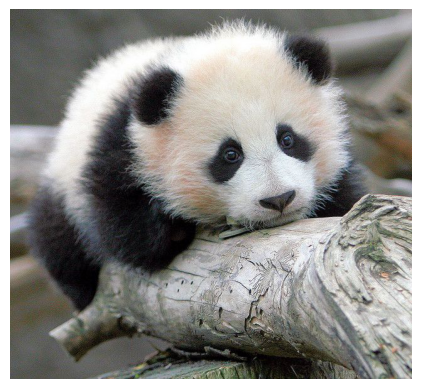

In [25]:
from PIL import Image 
import matplotlib.pyplot as plt 

# open image
image = Image.open('panda.jpg')

# display image using matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

### Convert Image to Grayscale


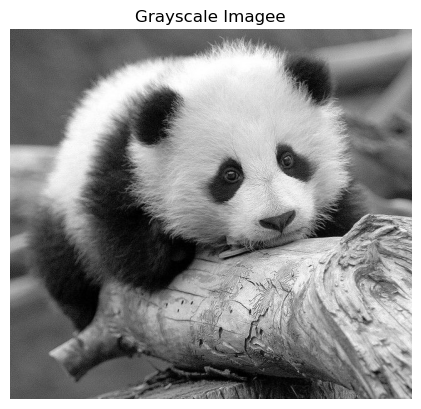

In [26]:
gray_image = image.convert('L') # convert image to grayscale
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title("Grayscale Imagee")
plt.show()

### Resize the Image


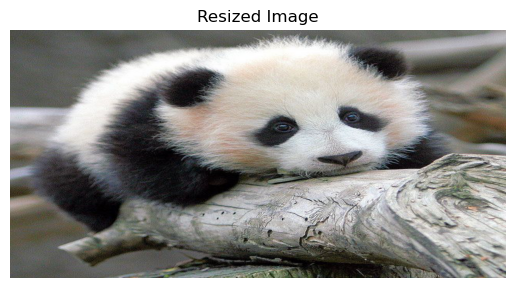

In [27]:
resized_image = image.resize((1000, 500))
plt.imshow(resized_image)
plt.axis('off')
plt.title("Resized Image")
plt.show()

### Rotate the image


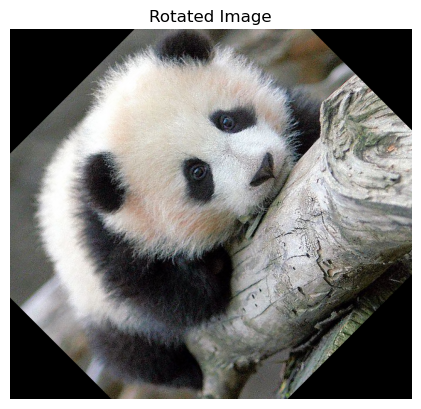

In [28]:
rotated_image = image.rotate(45)
plt.imshow(rotated_image)
plt.axis('off')
plt.title('Rotated Image')
plt.show()

### Flip the Image (Mirror)


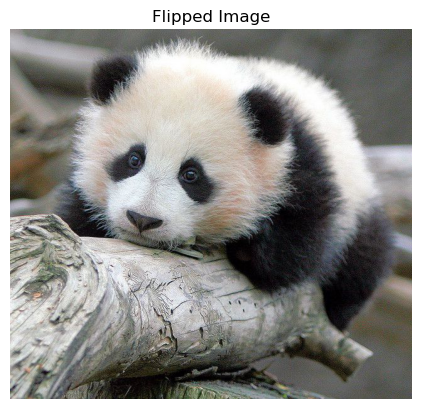

In [29]:
flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(flipped_image)
plt.axis('off')
plt.title('Flipped Image')
plt.show()

### Crop a Region


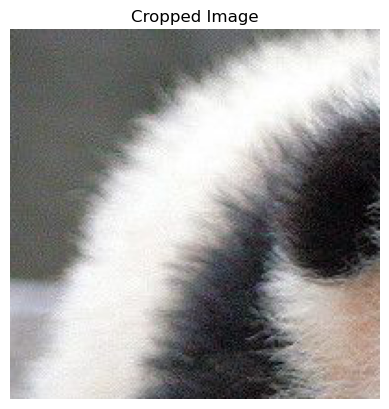

In [30]:
# corp box: (left, upper, right, lower)
cropped_image = image.crop((50, 50, 250, 250))
plt.imshow(cropped_image)
plt.axis('off')
plt.title("Cropped Image")
plt.show()

## Filtering


### Blur Filter


In [31]:
# importing ImageFilter from PIL
from PIL import ImageFilter

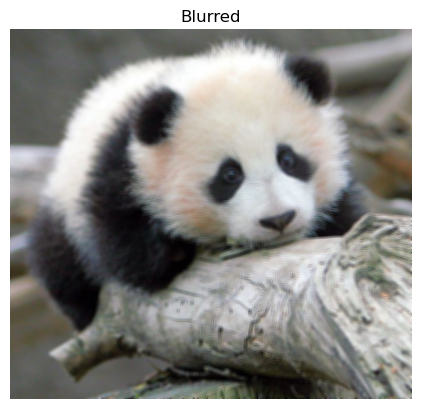

In [32]:
blurred = image.filter(ImageFilter.BLUR)
plt.imshow(blurred)
plt.axis('off')
plt.title("Blurred")
plt.show()

### Contour Filter


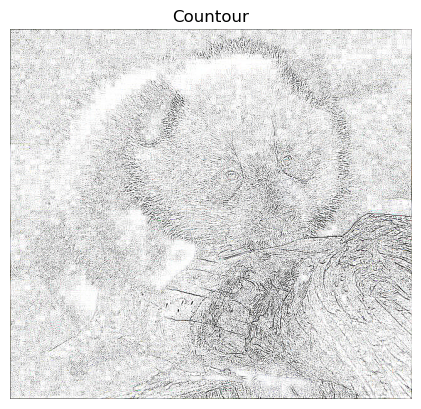

In [33]:
contour = image.filter(ImageFilter.CONTOUR)
plt.imshow(contour)
plt.axis('off')
plt.title("Countour")
plt.show()

### Detailed Enhacement


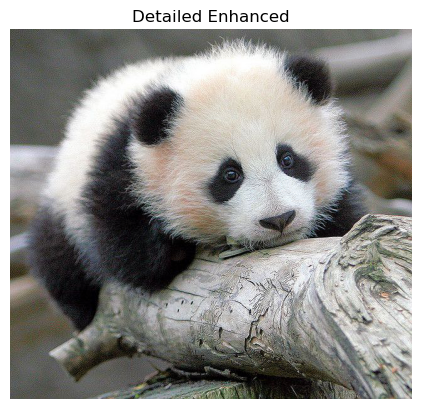

In [34]:
detailed = image.filter(ImageFilter.DETAIL)
plt.imshow(detailed)
plt.axis('off')
plt.title("Detailed Enhanced")
plt.show()

### Edge Enhasment


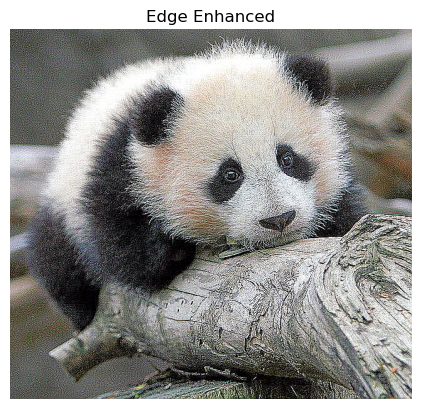

In [35]:
edge = image.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(edge)
plt.axis('off')
plt.title("Edge Enhanced")
plt.show()


### Emboss Filter


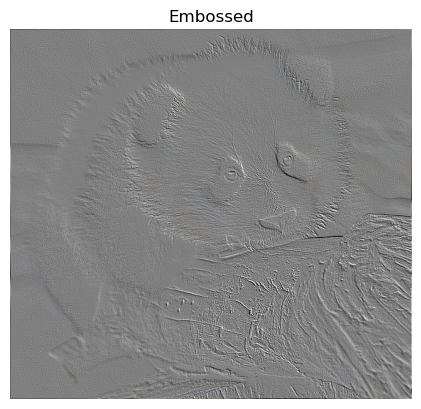

In [36]:
emboss = image.filter(ImageFilter.EMBOSS)
plt.imshow(emboss)
plt.axis('off')
plt.title("Embossed")
plt.show()

### Sharpen Filter


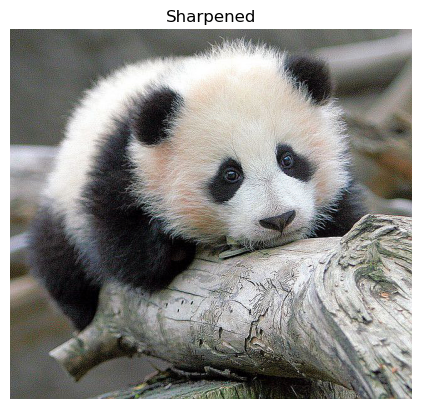

In [ ]:
sharpened = image.filter(ImageFilter.SHARPEN)
plt.imshow(sharpened)
plt.axis('off')
plt.title("Sharpened")
plt.imshow(sharpened)

### Custom Filterd


In [38]:
# you need to install OpenCV to use this
import cv2

In [39]:
!pip list

Package                           Version
--------------------------------- -------------------
absl-py                           2.1.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anyio                             4.7.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.3.0
astroid                           3.3.8
astropy                           6.1.3
astropy-iers-data                 0.2025.6.23.0.39.50
asttokens                         3.0.0
astunparse                        1.6.3
async-lru                         2.0.4
async-timeout                     5.0.1
asyncssh                          2.17.0
atomicwrites                      1.4.0
att